In [1]:
import sys
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 10)

util_path = '/Users/Andrey/IdeaProjects/z2'
if util_path not in sys.path:
    sys.path.append(util_path)

In [2]:
import dlasyd_util.main as m

In [3]:
cont_features = m.load_continuous_features()
cat_features = m.load_categorical_features()
cat_features.remove('propertycountylandusecode')
all_features = cont_features + cat_features
data = m.get_data_with_features(all_features)
data[cont_features] = data[cont_features].fillna(data.mean())
data[cat_features] = data[cat_features].apply(lambda x:x.fillna(x.value_counts().index[0]))




regression = linear_model.LinearRegression()
data[all_features].head()

finishedsquarefeet12    latitude    longitude  lotsizesquarefeet  \
0            900.000000  33726375.0 -117870284.0        6250.000000   
1           1745.454531  33429836.0 -117626931.0        9864.000000   
2           1270.000000  34264234.0 -119226278.0       29110.164177   
3           6646.000000  33596000.0 -117861070.0       10686.000000   
4            834.000000  34452318.0 -118496376.0      143295.000000   

   calculatedfinishedsquarefeet  structuretaxvaluedollarcnt  \
0                         900.0                     38663.0   
1                        1847.0                     60837.0   
2                        1270.0                    189614.0   
3                        6646.0                    695138.0   
4                         834.0                     86038.0   

   landtaxvaluedollarcnt  taxamount    fips  rawcensustractandblock  \
0               194877.0    2913.10  6059.0            6.059074e+07   
1               781517.0    8682.80  6059.0            6.059042e+07   
2               126477.0    3299.66  6111.0            6.111002e+07   
3              1542854.0   24121.04  6059.0            6.059063e+07   
4                99533.0    2736.14  6037.0            6.037920e+07   

          ...           bedroomcnt  calculatedbathnbr  fullbathcnt  \
0         ...                  2.0                1.0          1.0   
1         ...                  0.0                2.0          2.0   
2         ...                  2.0                2.0          2.0   
3         ...                  5.0                6.0          6.0   
4         ...                  2.0                1.0          1.0   

   propertylandusetypeid  regionidcity  regionidcounty  regionidzip  \
0                  261.0       47568.0          1286.0      97007.0   
1                  247.0       13693.0          1286.0      96982.0   
2                  266.0       34543.0          2061.0      97083.0   
3                  261.0       53571.0          1286.0      96957.0   
4                  266.0       54311.0          3101.0      96373.0   

   taxvaluedollarcnt  assessmentyear  censustractandblock  
0           233540.0          2015.0         6.059074e+13  
1           842354.0          2015.0         6.059042e+13  
2           316091.0          2015.0         6.111002e+13  
3          2237992.0          2015.0         6.059063e+13  
4           185571.0          2015.0         6.037920e+13  

[5 rows x 22 columns]

In [23]:
for col in cat_features:
    print('\n\n' + col)
    print(data[col].value_counts())
    #plt.title(col)
   # plt.hist(x=data[col], bins =200)
    #plt.show()



fips
6037.0    58574
6059.0    24505
6111.0     7196
Name: fips, dtype: int64


rawcensustractandblock
6.037920e+07    84
6.059063e+07    73
6.037274e+07    65
6.059032e+07    62
6.037920e+07    60
6.059052e+07    52
6.037137e+07    49
6.037277e+07    45
6.111007e+07    44
6.037577e+07    42
6.059052e+07    40
6.059063e+07    39
6.037920e+07    38
6.037208e+07    37
6.059052e+07    36
6.059053e+07    36
6.059063e+07    34
6.111008e+07    34
6.037275e+07    33
6.037578e+07    33
6.111006e+07    33
6.059032e+07    33
6.037277e+07    32
6.037139e+07    31
6.037201e+07    31
6.059063e+07    31
6.111006e+07    29
6.037920e+07    29
6.059063e+07    29
6.059075e+07    29
                ..
6.059012e+07     1
6.059076e+07     1
6.059064e+07     1
6.037403e+07     1
6.037107e+07     1
6.037800e+07     1
6.037670e+07     1
6.111004e+07     1
6.037464e+07     1
6.037107e+07     1
6.037551e+07     1
6.037409e+07     1
6.037555e+07     1
6.037186e+07     1
6.037910e+07     1
6.059088e+07     1
6.

In [13]:
import sklearn.preprocessing as pre
import numpy as np

border = 0.1
newdata = data[(data.logerror < border) & (data.logerror > (border * (-1)))]
 
poly = pre.PolynomialFeatures(1)
oneHot = pre.OneHotEncoder(categorical_features=[9])

In [12]:


for i in range(10):
    newdata = newdata.sample(frac=1).reset_index(drop=True)

    all_X = newdata[all_features].values
    all_y = newdata['logerror'].values
    
    #all_X_P = poly.fit_transform(all_X)
    all_X_P = all_X
    all_X_P = oneHot.fit_transform(all_X)
    
    train_sizes2=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
    train_sizes1=[.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0]

    
    regression = linear_model.LinearRegression(normalize=True)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=regression, X=all_X_P, y=all_y, train_sizes=train_sizes2,
                                                            cv=3, scoring='neg_mean_squared_error')

    m.plot_learning_curve(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, log=False)
    #m.plot_learning_curve(train_sizes=train_sizes, train_scores=train_scores, test_scores=None, log=False)

    
    

MemoryError: 

0.00160452439475


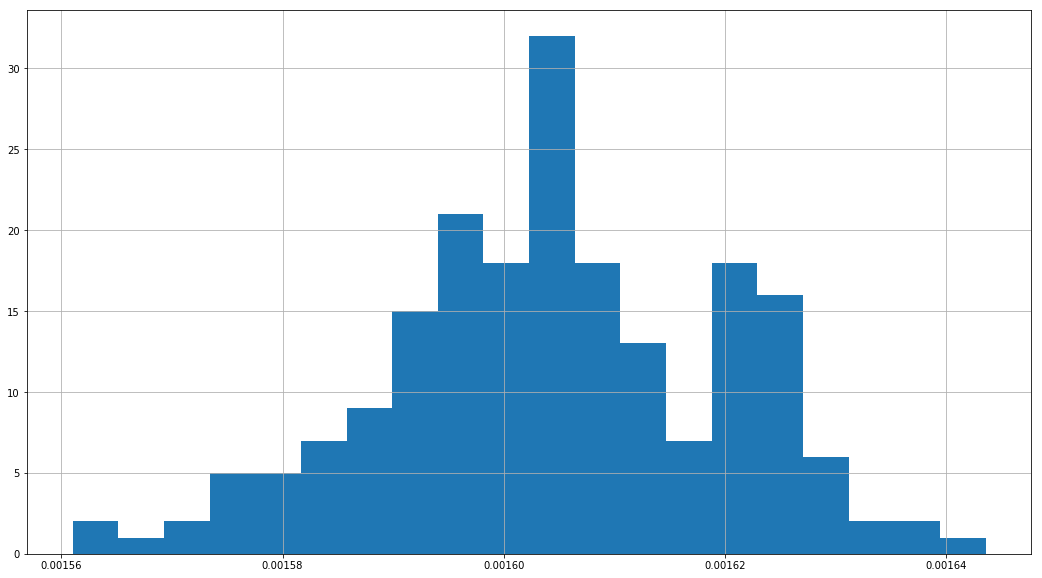

In [82]:
means = []
for i in range (200):
    data = data.sample(frac=1).reset_index(drop=True)
    train = data[:70000]
    train = train[(train.logerror < border) & (train.logerror > (border * (-1)))]

    cv = data[70000:]
    cv = cv[(cv.logerror < border) & (cv.logerror > (border * (-1)))]


    train_X = train[features]
    train_y = train['logerror']

    cv_X = cv[features]
    cv_y = cv['logerror']

    poly = pre.PolynomialFeatures(1)
    train_X_P = poly.fit_transform(train_X)
    cv_X_P = poly.fit_transform(cv_X)

    regression.fit(train_X_P, train_y)
    #regression.predict(cv_X_P)
    means.append(np.mean((regression.predict(cv_X_P) - cv_y) ** 2))
print(np.average(means))

plt.hist(x=means, bins=20)
plt.grid()
plt.show()

0.149618925626


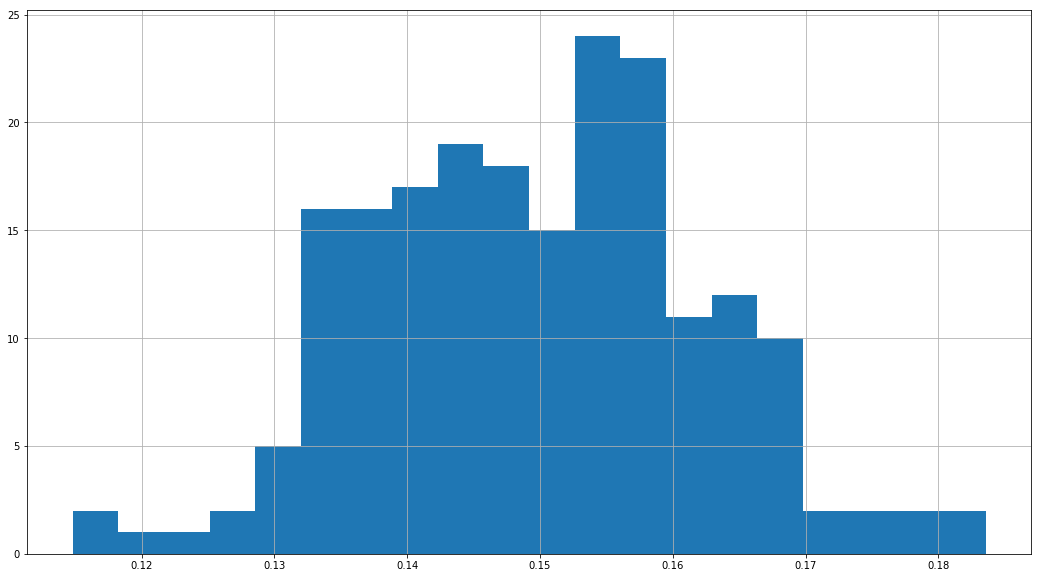

In [79]:
means = []
for i in range (200):
    data = data.sample(frac=1).reset_index(drop=True)
    train = data[:70000]
    train = train[(train.logerror > border) | (train.logerror < (border * (-1)))]

    cv = data[70000:]
    cv = cv[(cv.logerror > border) | (cv.logerror < (border * (-1)))]


    train_X = train[features]
    train_y = train['logerror']

    cv_X = cv[features]
    cv_y = cv['logerror']

    poly = pre.PolynomialFeatures(1)
    train_X_P = poly.fit_transform(train_X)
    cv_X_P = poly.fit_transform(cv_X)

    regression.fit(train_X_P, train_y)
    #regression.predict(cv_X_P)
    means.append(np.mean((regression.predict(cv_X_P) - cv_y) ** 2))
print(np.average(means))

plt.hist(x=means, bins=20)
plt.grid()
plt.show()